<a href="https://colab.research.google.com/github/EvaaVos/Quantum_Computing_Course/blob/main/Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Instalation Qiskit!

In [ ]:
%pip install qiskit
%pip install qiskit[visualization]

# First Circuit

In [ ]:
from qiskit import *
from qiskit.visualization import plot_coupling_map

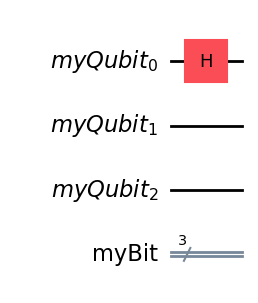

In [ ]:
#Creando el primer circuito cuantico

myQR= QuantumRegister(3,'myQubit') # Creamos un registro cuantico de 2 qubit
myCR=ClassicalRegister(3,'myBit')  # Creamos un registro clasico de 2 bits
myQC= QuantumCircuit(myQR,myCR)    # Creamos nuestro circuito que combina el registro cuantico y el clasico.

myQC.h(myQR[0])                    # Colocamos una puerta H, que actua sobre qubit 1 [0]
myQC.draw(output='mpl')            # Dibujamos el circuito

# IBMQ providers

QPUs available in IBM Quantum Platform and from Qiskit.

In [ ]:
%pip install qiskit-ibm-runtime  ## Old IBQM

In [ ]:
# To load the IBMQ computers you have two options:

# 1) Authetify IBMQ service
service = QiskitRuntimeService(channel="ibm_quantum", token="dffdc04a14ef92a1dc950549f7c83fb64d1e56fae3c4d3b1674366b88cd4e550dd24cd1acddf0805a14f5f37dc0863d60994c750e3c5f2d1cb163dc4c69bc92a")

# 2) Save the IBMQ account
#service_save=QiskitRuntimeService.save_account(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>", set_as_default=True)



In [ ]:
service.backends()   # These are the computers I have access to

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [ ]:
## Filter the search of one computer
filter_QPU = service.backends(simulator=False, operational=True, min_num_qubits=5) # Here, we are looking for a real quantum computer operative with at least 5 qubits

print ('Here you have the list of quantum computers based on the parameters:')
print()
service.backends(simulator=False, operational=True, min_num_qubits=5)

Here you have the list of quantum computers based on the parameters:



[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [ ]:
## Characteristic of an example QPU

QPU = service.backend("ibm_sherbrooke")

print (type(QPU))
print(dir(QPU))

print(
    f"Name: {QPU.name}\n"
    f"Version: {QPU.version}\n"
    f"No. of qubits: {QPU.num_qubits}\n"
    f"Status: {QPU.status}\n"
    f"Qubits properties: {QPU.qubit_properties}\n"
    f"Instructions: {QPU.instructions}\n"
    f"Configuration: {QPU.configuration}\n"
)

print(dir(QPU.configuration()))

###  Queria ilustrar como es la connectividad de los qubits del ibm_sherbrooke
###  pero no lo consegui

#edges = QPU.coupling_map.get_edges()
#coords = QPU.configuration().qubit_coordinates
#qubit_coordinates = {i: tuple(coords[i]) for i in range(QPU.num_qubits)}

# Plot
plot_coupling_map(qubit_coordinates=qubit_coordinates, coupling_map=edges)

<class 'qiskit_ibm_runtime.ibm_backend.IBMBackend'>
['__abstractmethods__', '__call__', '__class__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_api_client', '_check_circuits_attributes', '_configuration', '_convert_to_target', '_coupling_map', '_default_options', '_defaults', '_instance', '_max_circuits', '_options', '_properties', '_provider', '_service', '_target', 'backend_version', 'check_faulty', 'configuration', 'coupling_map', 'defaults', 'description', 'dt', 'dtm', 'get_translation_stage_plugin', 'id_warning_issued', 'instruction_durations', 'instructions', 'max_circuits', 'meas_map', 'name', 'num_qubits', 'online_date', 

AttributeError: Attribute qubit_coordinates is not defined

# AER Quantum Simulator


Qiskit Aer is high-performance quantum computing simulators with realistic noise models

In [ ]:
%pip install qiskit-aer
from qiskit_aer import AerProvider, AerSimulator

In [ ]:
## List of available simulators

provider = AerProvider()
list_provider = AerProvider.backends(provider)

print ('The simulators available in Qiskit Aer is:')
print ()
AerProvider.backends(provider)

The simulators available in Qiskit Aer is:



[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [ ]:
## Characteristic of AerSimulator (an example)
simulator_example = AerSimulator()
devices_example = AerSimulator.available_devices(simulator_example)
methods_example = AerSimulator.available_methods(simulator_example)

print ('The device in AerSimulator is', devices_example)
print ('The methods available in AerSimulator are',methods_example)

The device in AerSimulator is ('CPU',)
The methods available in AerSimulator are ('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop')
